<a href="https://colab.research.google.com/github/alonziv1/Machine-Learning/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing libraries and loading dataset**

In [ ]:
#@title

def plot_corr_matrix(df, title):
  corr_matrix = np.abs(df.corr()).round(decimals=3)

  mask = np.zeros_like(corr_matrix, dtype=bool)
  mask[np.triu_indices_from(mask)]= True

  f, ax = plt.subplots(figsize=(15, 20)) 
  heatmap = sns.heatmap(corr_matrix, 
                        mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = "OrRd",
                        cbar_kws = {'shrink': .6, "ticks" : [0, 0.5, 1]},
                        vmin = 0, 
                        vmax = 1,
                        annot = True,
                        annot_kws = {"size": 12})
  #add the column names as labels
  ax.set_title(title)
  ax.set_yticklabels(corr_matrix.columns, rotation = 0)
  ax.set_xticklabels(corr_matrix.columns)
  sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


def plot3d(df, colX, colY, colZ, hue=None):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 5))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=1)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=1)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=1)

    ax.set_xlabel(colX)
    ax.set_ylabel(colY)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    ax.view_init(elev=5., azim=45*i)
  
  axes[0].set_zlabel("\n" + colZ, linespacing=2.2)

  plt.tight_layout()
  plt.show()

def visualize_clf(clf, X, Y, title, marker_size=150,
                  grid_length=300):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["P", "v"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())
    #plot_step = 0.02

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(range(n_classes), palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)

##**Answer 1**

In [ ]:
dataset.shape

(2500, 28)

##**Answer 2**

In [ ]:
dataset['num_of_siblings'].value_counts()

1.0    786
2.0    553
0.0    544
3.0    318
4.0    120
5.0     34
6.0      9
7.0      1
8.0      1
9.0      1
Name: num_of_siblings, dtype: int64

##**Answer 5**

In [ ]:
columns = dataset.columns.tolist()
print(*columns, sep = "\n")

patient_id
age
sex
weight
blood_type
address
current_location
num_of_siblings
happiness_score
household_income
conversations_per_day
sugar_levels
sport_activity
symptoms
pcr_date
PCR_01
PCR_02
PCR_03
PCR_04
PCR_05
PCR_06
PCR_07
PCR_08
PCR_09
PCR_10
risk
spread
covid


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data= train_test_split(dataset, test_size=0.2, train_size=0.8, random_state=156)

##**Answer 6**

In [ ]:
pd.options.mode.chained_assignment = None
first_df = train_data[['risk', 'PCR_04', 'PCR_08', 'PCR_10']]
second_df = first_df.copy()
first_df.replace({"High": 1, "Low": 0}, inplace=True)
print(first_df.corr().head(1))

      risk    PCR_04    PCR_08    PCR_10
risk   1.0 -0.007096 -0.021541  0.104091


##**Answer 7**

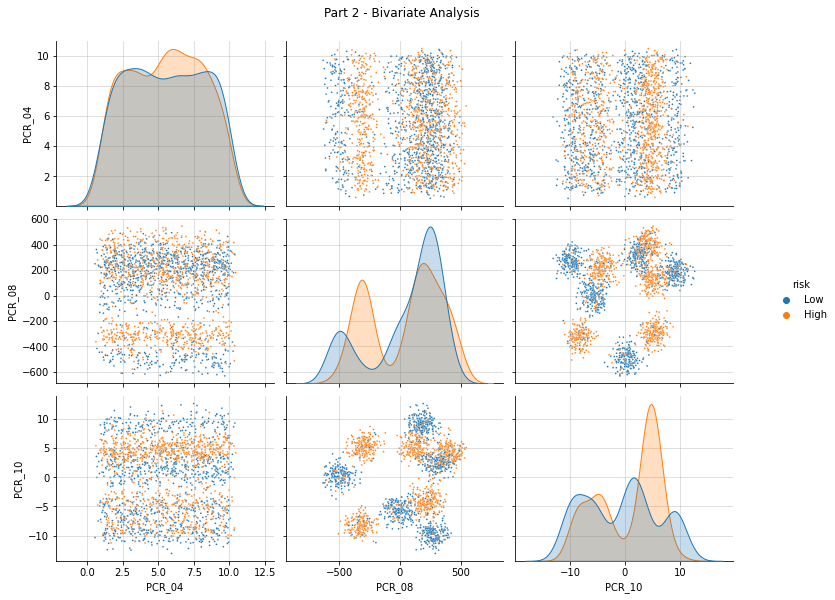

In [ ]:
g=sns.pairplot(second_df, hue="risk", plot_kws={"s": 3})
g.fig.suptitle("Part 2 - Bivariate Analysis", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

#**KNN Implementation**

In [ ]:
from sklearn import neighbors
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial import distance
from scipy import stats


class kNN(BaseEstimator, ClassifierMixin):
 
 def __init__(self, n_neighbors:int = 5):
  self.n_neighbors = n_neighbors
 
 def fit(self, X, y):
  self.X = np.copy(X)
  self.y = np.copy(y)
  return self

 def _predicted_label(self, neighbors_labels):
    return stats.mode(neighbors_labels).mode[0]
  
 def predict(self, X):

    distance_matrix = distance.cdist(self.X, np.copy(X))
    neighbors_indices_matrix = np.argpartition(distance_matrix, self.n_neighbors, axis=0)[:self.n_neighbors, :].transpose()
    predictions = np.copy(pd.DataFrame(self.y[neighbors_indices_matrix]).agg(self._predicted_label, axis=1))
    return predictions


##**Answer 8 - Testing KNN with 2 features**

In [ ]:
two_features_train = train_data[['PCR_08','PCR_10']].copy()
two_features_test = test_data[['PCR_08','PCR_10']].copy()
train_data.replace({"High": 1, "Low": 0}, inplace=True)
test_data.replace({"High": 1, "Low": 0}, inplace=True)
risk_train = train_data['risk'].copy()
risk_test = test_data['risk'].copy()

In [ ]:
my_knn_1_neighbor = kNN(1)
my_knn_1_neighbor.fit(two_features_train ,risk_train)
print("with 1 neighbor the train accuracy is", my_knn_1_neighbor.score(two_features_train ,risk_train))
print("with 1 neighbor the test accuracy is",  my_knn_1_neighbor.score(two_features_test ,risk_test))

my_knn_9_neighbors = kNN(9)
my_knn_9_neighbors.fit(two_features_train ,risk_train)
print("with 9 neighbors the train accuracy is", my_knn_9_neighbors.score(two_features_train,risk_train))
print("with 9 neighbors the test accuracy is",  my_knn_9_neighbors.score(two_features_test ,risk_test))


with 1 neighbor the train accuracy is 1.0
with 1 neighbor the test accuracy is 0.792
with 9 neighbors the train accuracy is 0.827
with 9 neighbors the test accuracy is 0.828


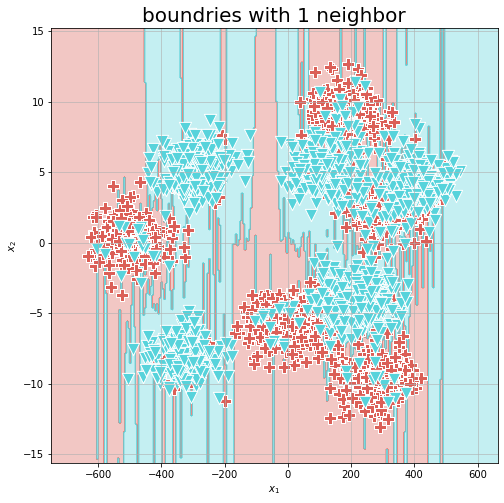

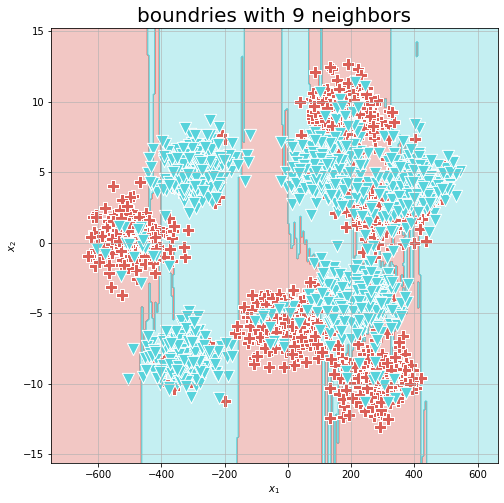

In [ ]:
visualize_clf(my_knn_1_neighbor, two_features_train.to_numpy(), risk_train.to_numpy(), 'boundries with 1 neighbor')
visualize_clf(my_knn_9_neighbors, two_features_train.to_numpy(), risk_train.to_numpy(),'boundries with 9 neighbors')

##**Answer 9 - Normalization**

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (-1,1))
scaled_two_features_train = scaler.fit_transform(two_features_train)
scaled_two_features_test = scaler.transform(two_features_test)

In [ ]:
my_normalized_knn_1_neighbor = kNN(1)
my_normalized_knn_1_neighbor.fit(scaled_two_features_train ,risk_train)
print("with 1 neighbor the train accuracy is", my_normalized_knn_1_neighbor.score(scaled_two_features_train ,risk_train))
print("with 1 neighbor the test accuracy is",  my_normalized_knn_1_neighbor.score(scaled_two_features_test ,risk_test))

my_normalized_knn_9_neighbors = kNN(9)
my_normalized_knn_9_neighbors.fit(scaled_two_features_train ,risk_train)
print("with 9 neighbors the train accuracy is", my_normalized_knn_9_neighbors.score(scaled_two_features_train,risk_train))
print("with 9 neighbors the test accuracy is",  my_normalized_knn_9_neighbors.score(scaled_two_features_test ,risk_test))


with 1 neighbor the train accuracy is 1.0
with 1 neighbor the test accuracy is 0.758
with 9 neighbors the train accuracy is 0.8635
with 9 neighbors the test accuracy is 0.842


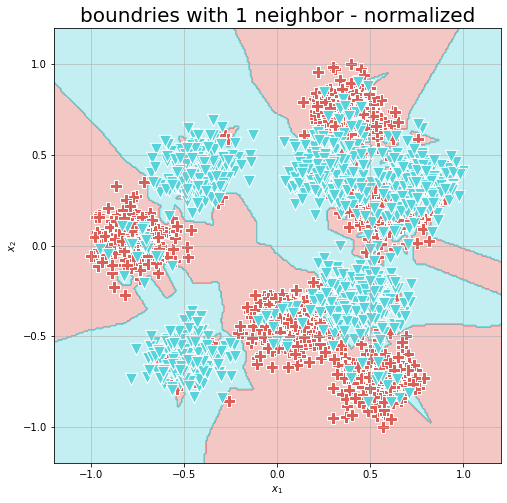

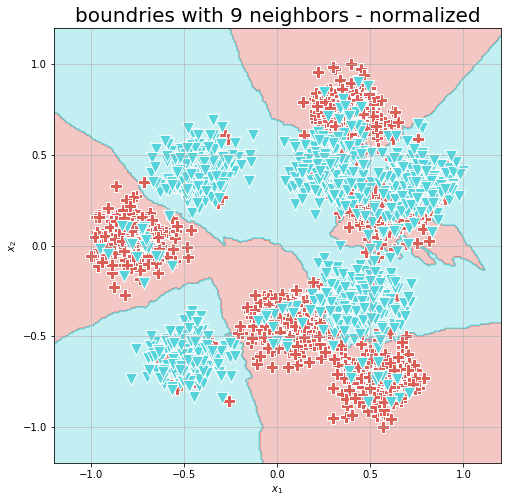

In [ ]:
visualize_clf(my_normalized_knn_1_neighbor, scaled_two_features_train, risk_train.to_numpy(), 'boundries with 1 neighbor - normalized')
visualize_clf(my_normalized_knn_9_neighbors, scaled_two_features_train, risk_train.to_numpy(),'boundries with 9 neighbors - normalized')

##**Answers 11- 13**

###**transform_features**

In [ ]:
def transform_features(data):

  string_to_numeric(data)
  data = one_hot_encoding(data)
  unique_symptoms = get_symptoms(data)
  data = add_symptoms_features(data, unique_symptoms)
  string_to_numeric(data)

  return data

###**string_to_numeric**

In [ ]:
def string_to_numeric(data):
  data.replace({"High": 1, "Low": 0}, inplace=True)
  data.replace({"F": 1, "M": 0}, inplace=True)
  data.replace({True: 1, False: 0}, inplace=True)
  

###**one_hot_encoding**

In [ ]:
def one_hot_encoding(data):
  
  blood_type_num = pd.get_dummies(data['blood_type'])
  joined_data = data.join(blood_type_num)
  joined_data.drop(['blood_type'], axis = 1, inplace = True)

  return joined_data

###**get symptoms**

In [ ]:
def get_symptoms(data):
  import itertools
  symptoms_list = data['symptoms'].unique()
  unique_symptoms = []
  for i in symptoms_list:
    if (type(i) is str):
      unique_symptoms.append(i.split(";")) 

  unique_symptoms = list(itertools.chain.from_iterable(unique_symptoms))
  unique_symptoms = pd.Series(unique_symptoms)
  unique_symptoms = unique_symptoms.unique()

  return unique_symptoms

###**add_symptoms_features**

In [ ]:
def add_symptoms_features(data, unique_symptoms):
  
  symptoms_df = pd.DataFrame(index=range(data.shape[0]))
  for symptom in unique_symptoms:
    symptoms_df[symptom] = np.nan
  symptoms_df.fillna(0, inplace=True)
  symptoms_df[np.isnan(symptoms_df)] = 0

  
  joined_data = data.join(symptoms_df)

  for index in joined_data.index:
    if(type(joined_data['symptoms'][index]) is not str):
      continue
    for symptom in unique_symptoms:
      if (symptom in joined_data['symptoms'][index]):
        joined_data[symptom][index] = 1

  joined_data.drop(['symptoms'], axis = 1, inplace = True)
  
  return joined_data     

##**perform the transformed**

In [ ]:
train_data = transform_features(train_data)

##**Answer 14**

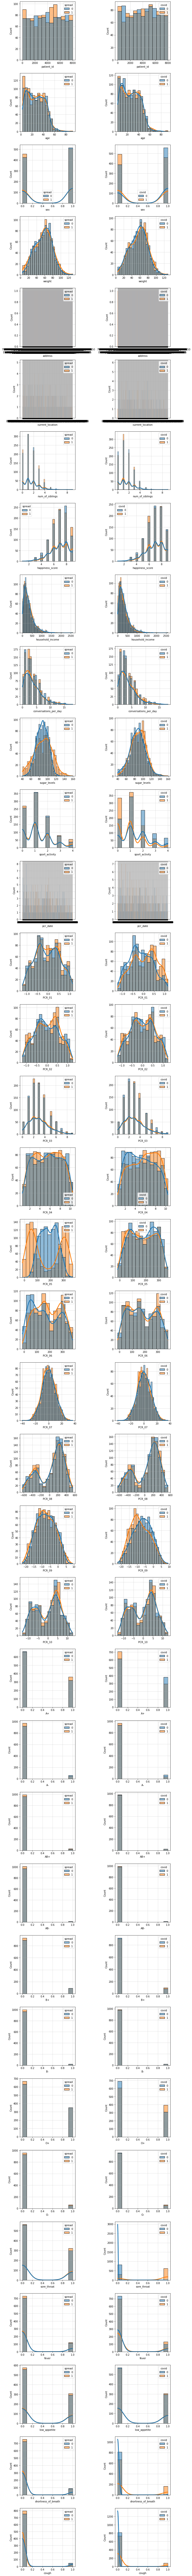

In [ ]:
COL_NAME = train_data.columns.drop(['risk', 'spread','covid'])
COLS = 3
ROWS = len(COL_NAME)
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
 column = COL_NAME[row]
 plt.subplot(ROWS,COLS, row * COLS + 1)
 sns.histplot(data=train_data, x=column, hue="spread", line_kws={"linewidth": 3},
 kde=("float" in train_data[column].dtype.name))
 plt.grid(alpha=0.5)
 plt.subplot(ROWS,COLS, row * COLS + 2)
 sns.histplot(data=train_data, x=column, hue="covid", line_kws={"linewidth": 3},
 kde=("float" in train_data[column].dtype.name))
 plt.grid(alpha=0.5)
plt.tight_layout()

##**Answer 15**

In [ ]:
s = train_data.corr().spread.abs()
s.sort_values(kind="quicksort", ascending=False)

spread                   1.000000
PCR_06                   0.110631
PCR_05                   0.102074
sugar_levels             0.049370
risk                     0.044746
cough                    0.036731
A-                       0.033408
A+                       0.028649
happiness_score          0.027360
PCR_07                   0.026987
sex                      0.024064
PCR_09                   0.020946
AB+                      0.020161
covid                    0.019947
O-                       0.019175
sport_activity           0.016498
PCR_04                   0.016336
sore_throat              0.015284
PCR_10                   0.014881
PCR_03                   0.012812
O+                       0.011880
shortness_of_breath      0.011339
conversations_per_day    0.011327
AB-                      0.011280
num_of_siblings          0.009186
household_income         0.008773
PCR_01                   0.008326
PCR_08                   0.007854
B+                       0.005940
low_appetite  

##**Answer 20**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
train_data['happiness_score'] = imputer.fit_transform(train_data[['happiness_score']])

##**Answer 21**

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
def select_features(data):
  _data = data[['PCR_01','PCR_02','PCR_03','PCR_04', 'PCR_05', 'PCR_06','PCR_07','PCR_08','PCR_09' ,'PCR_10','sport_activity','sugar_levels','shortness_of_breath','sore_throat','low_appetite','fever','cough','sex','covid','spread','risk','A-','A+','AB-', 'AB+', 'B+', 'B-', 'O+', 'O-','happiness_score']]
  return _data
train_data = select_features(train_data)

In [ ]:
def select_features_after(data):
  return data.drop(columns = ['low_appetite', 'sex', 'A-', 'AB+', 'B+', 'B-', 'O+', 'O-'])

In [ ]:
def mean_imputate_features(data):
  
    mean_features = ['PCR_01','PCR_02','PCR_03','PCR_04', 'PCR_05', 'PCR_06','PCR_07','PCR_08','PCR_09' ,'PCR_10','sugar_levels','sport_activity','shortness_of_breath','sore_throat','fever','cough']
    imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
    data[mean_features] = imputer1.fit_transform(data[mean_features])

    return data

In [ ]:
def median_imputate_features(data):
  
    features = ['sport_activity']
    imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
    data[features] = imputer1.fit_transform(data[features])

    return data

In [ ]:
def most_freq_imputate_features(data):

    imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data[['sex', 'A+']] = imputer2.fit_transform(data[['sex', 'A+']])

    return data

In [ ]:
train_data.reset_index(inplace = True)

train_data = mean_imputate_features(train_data)
train_data = median_imputate_features(train_data)
train_data = most_freq_imputate_features(train_data)

train_data = select_features_after(train_data)

In [ ]:
train_data.isna().sum()

index                  0
PCR_01                 0
PCR_02                 0
PCR_03                 0
PCR_04                 0
PCR_05                 0
PCR_06                 0
PCR_07                 0
PCR_08                 0
PCR_09                 0
PCR_10                 0
sport_activity         0
sugar_levels           0
shortness_of_breath    0
sore_throat            0
fever                  0
cough                  0
covid                  0
spread                 0
risk                   0
A+                     0
AB-                    0
happiness_score        0
dtype: int64

##**Answer 22**

In [ ]:
def plot_A22(COL_NAME):
  COLS = 3
  ROWS = len(COL_NAME)
  plt.figure(figsize=(5 * COLS, 4 * ROWS))
  for row in range(ROWS):
    column = COL_NAME[row]
    plt.subplot(ROWS,COLS, row * COLS + 1)
    sns.histplot(data=train_data, x=column, hue="risk", line_kws={"linewidth": 3},kde=("float" in dataset[column].dtype.name))
    plt.grid(alpha=0.5)
    plt.subplot(ROWS,COLS, row * COLS + 2)
    sns.histplot(data=train_data, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=("float" in train_data[column].dtype.name))
    plt.grid(alpha=0.5)
    plt.subplot(ROWS,COLS, row * COLS + 3)
    sns.histplot(data=train_data, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=("float" in train_data[column].dtype.name))
    plt.grid(alpha=0.5)
  plt.tight_layout()

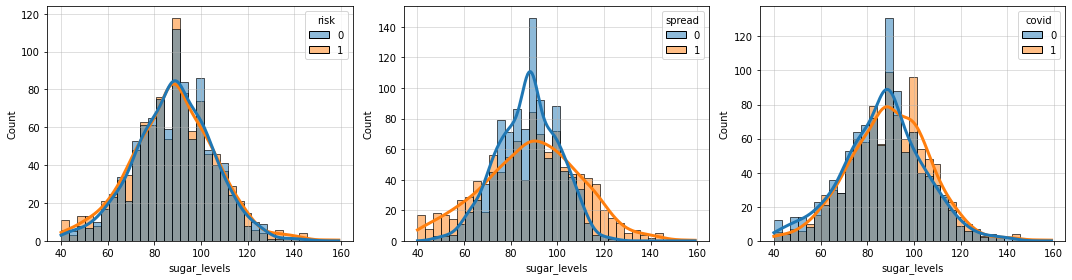

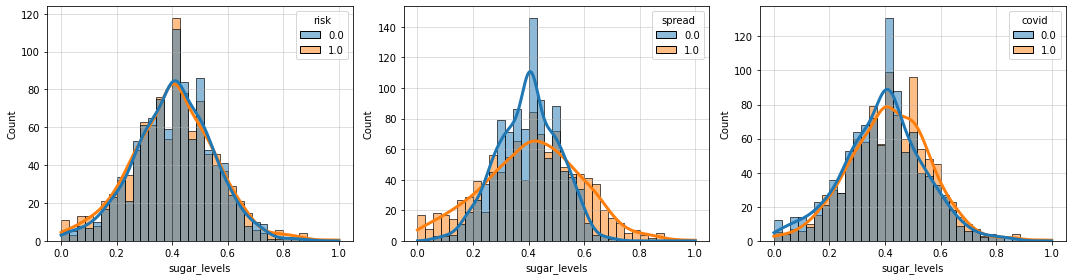

In [ ]:
from sklearn import preprocessing
Col = ['sugar_levels']
plot_A22(Col)
train_data.loc[:,:] = preprocessing.MinMaxScaler().fit_transform(train_data)
plot_A22(Col)

## **Answer 23-24**

In [ ]:
#question 23 & 24 pre-requests
pcr_df = train_data.copy()
colNames = pcr_df.columns[pcr_df.columns.str.contains(pat = 'PCR')]
pcr_df = pcr_df[colNames]
corr = pcr_df.corr()
corr.style.background_gradient(cmap='coolwarm') #cool correlation table


,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10
PCR_01,1.000000,0.002249,0.013317,-0.051755,-0.017606,-0.006771,0.017691,0.005566,0.039973,-0.006072
PCR_02,0.002249,1.000000,-0.001713,-0.036097,-0.026712,-0.005953,0.000521,-0.004661,0.010504,-0.003110
PCR_03,0.013317,-0.001713,1.000000,-0.005703,-0.031834,0.023836,-0.023266,-0.000724,-0.010396,-0.020373
PCR_04,-0.051755,-0.036097,-0.005703,1.000000,-0.013381,0.004935,0.011635,-0.045442,-0.858076,0.019479
PCR_05,-0.017606,-0.026712,-0.031834,-0.013381,1.000000,-0.089504,-0.028751,0.038480,0.319355,0.031208
PCR_06,-0.006771,-0.005953,0.023836,0.004935,-0.089504,1.000000,0.055923,0.012068,-0.027570,0.029795
PCR_07,0.017691,0.000521,-0.023266,0.011635,-0.028751,0.055923,1.000000,-0.015032,-0.015363,-0.016958
PCR_08,0.005566,-0.004661,-0.000724,-0.045442,0.038480,0.012068,-0.015032,1.000000,0.040673,0.113264
PCR_09,0.039973,0.010504,-0.010396,-0.858076,0.319355,-0.027570,-0.015363,0.040673,1.000000,-0.014500
PCR_10,-0.006072,-0.003110,-0.020373,0.019479,0.031208,0.029795,-0.016958,0.113264,-0.014500,1.000000


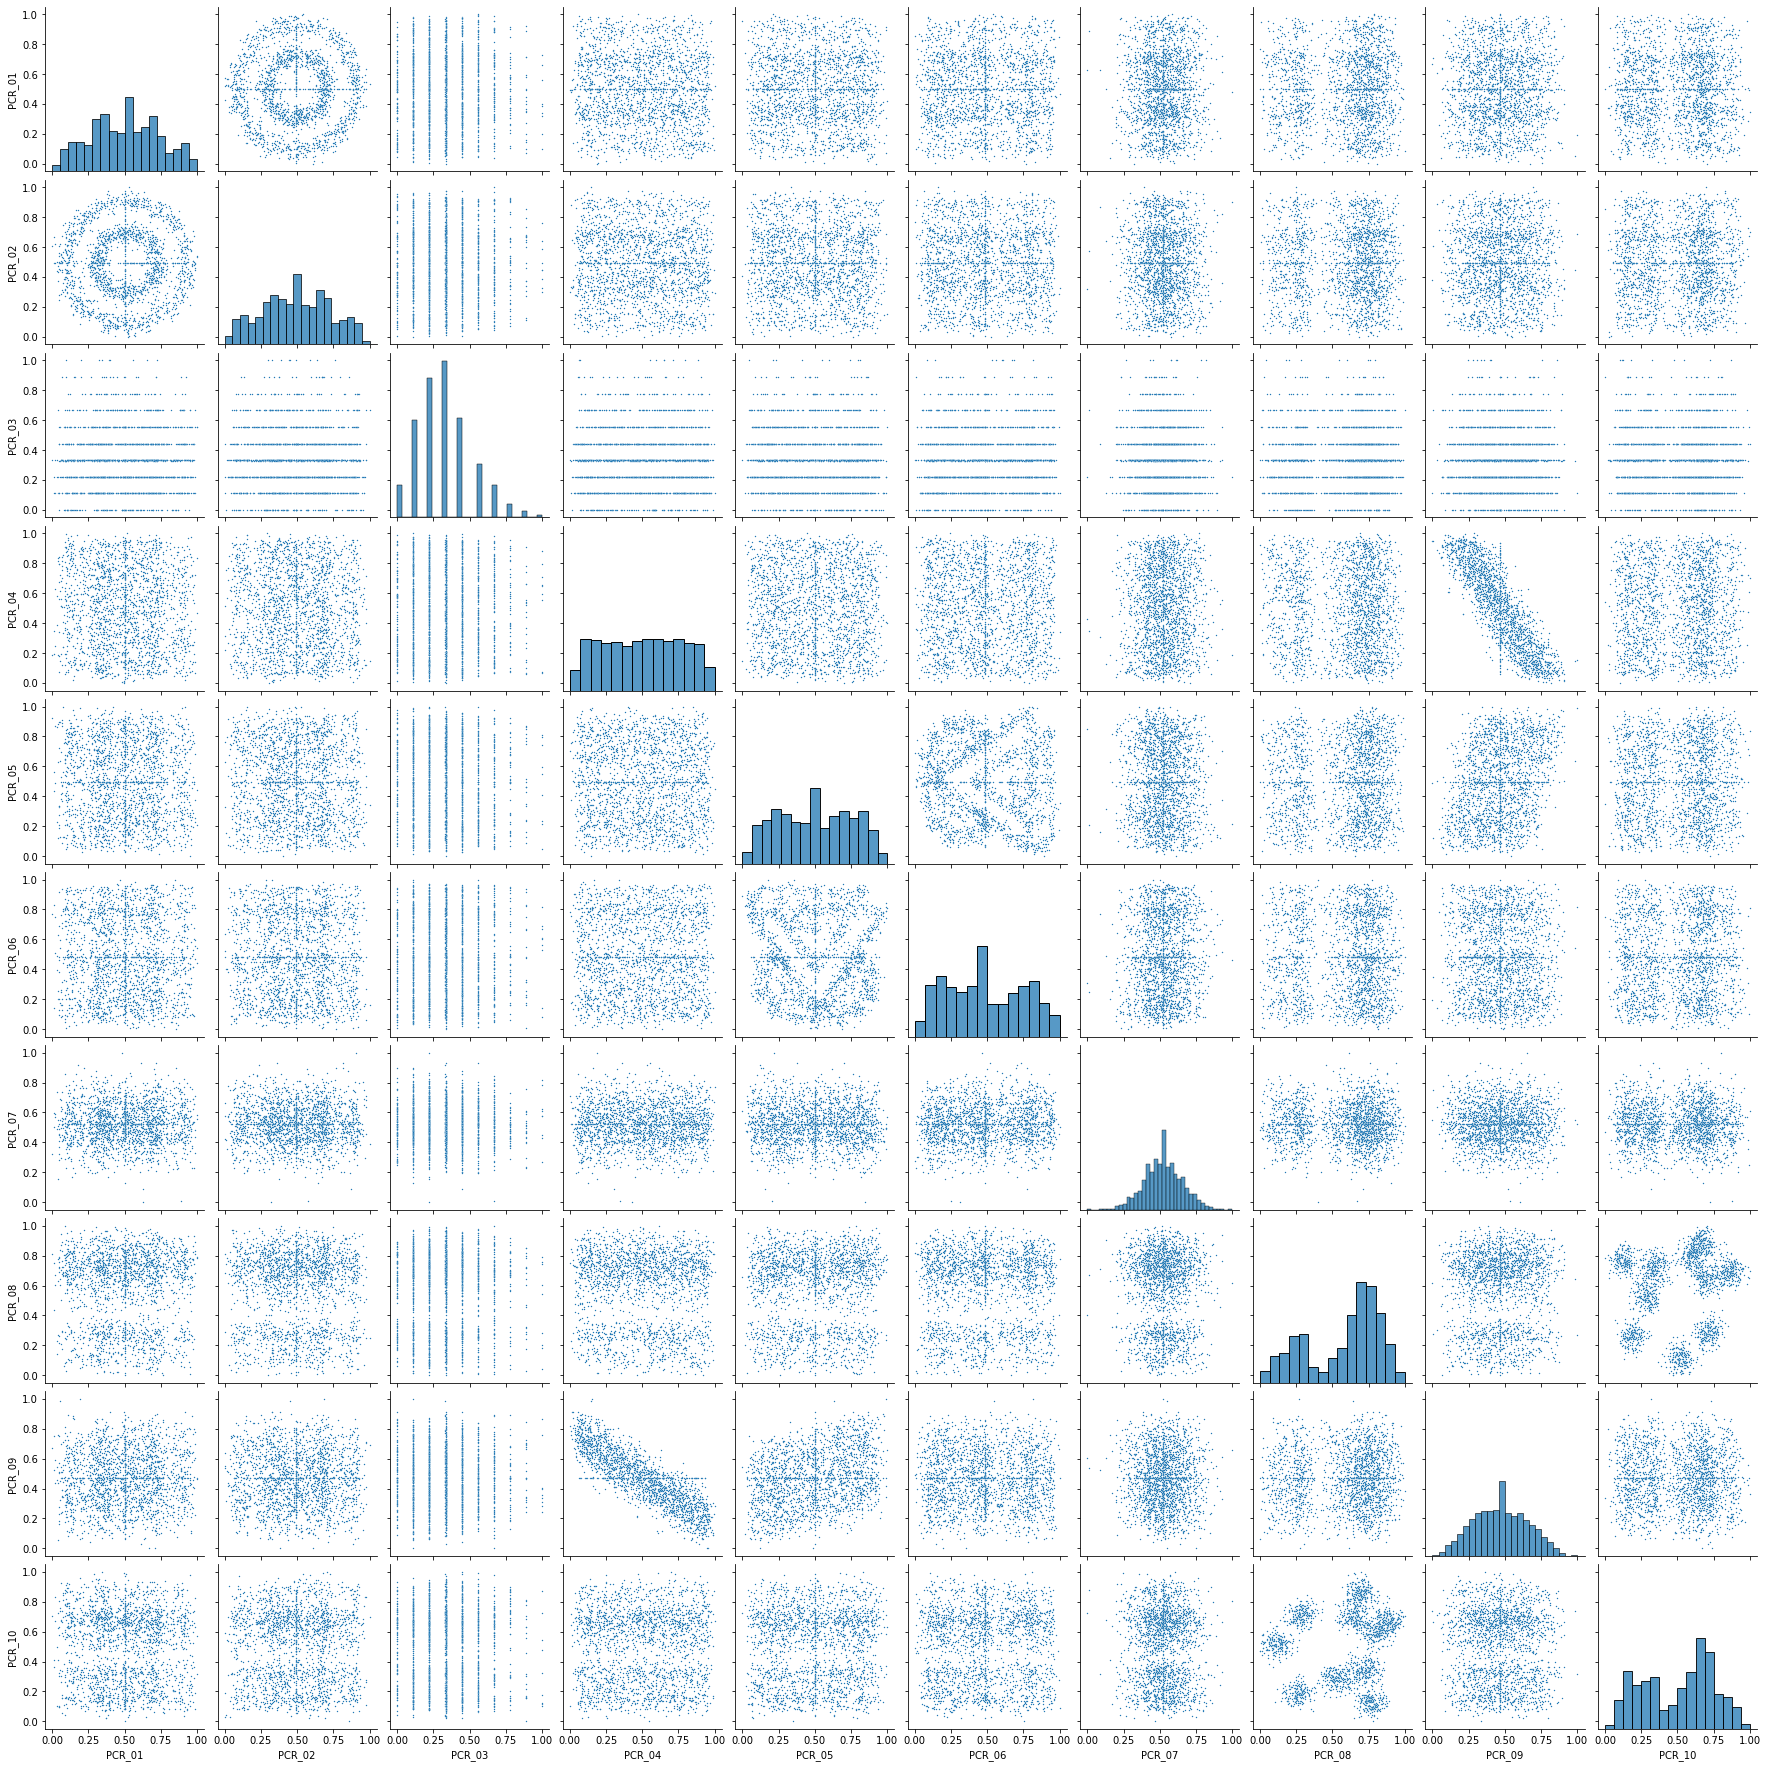

In [ ]:
#continue
sns.pairplot(data = pcr_df,plot_kws={"s": 2} )

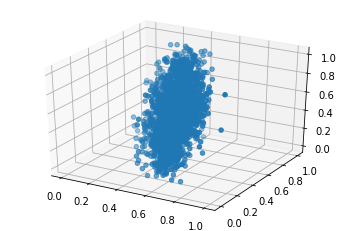

In [ ]:
#continue
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

ax.scatter3D(pcr_df['PCR_09'], pcr_df['PCR_04'], pcr_df['PCR_05']);

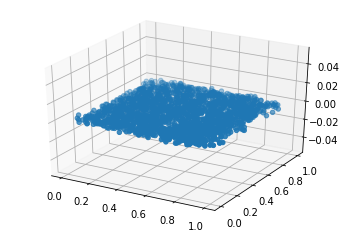

In [ ]:
#continue
ax2 = plt.axes(projection='3d')

# Data for a three-dimensional line

ax2.scatter3D(pcr_df['PCR_05'], pcr_df['PCR_04']);

In [ ]:
def plot3d(df, colX, colY, colZ, hue=None):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 5))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=1)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=1)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=1)

    ax.set_xlabel(colX)
    ax.set_ylabel(colY)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    ax.view_init(elev=5., azim=45*i)
  
  axes[0].set_zlabel("\n" + colZ, linespacing=2.2)

  plt.tight_layout()
  plt.show()

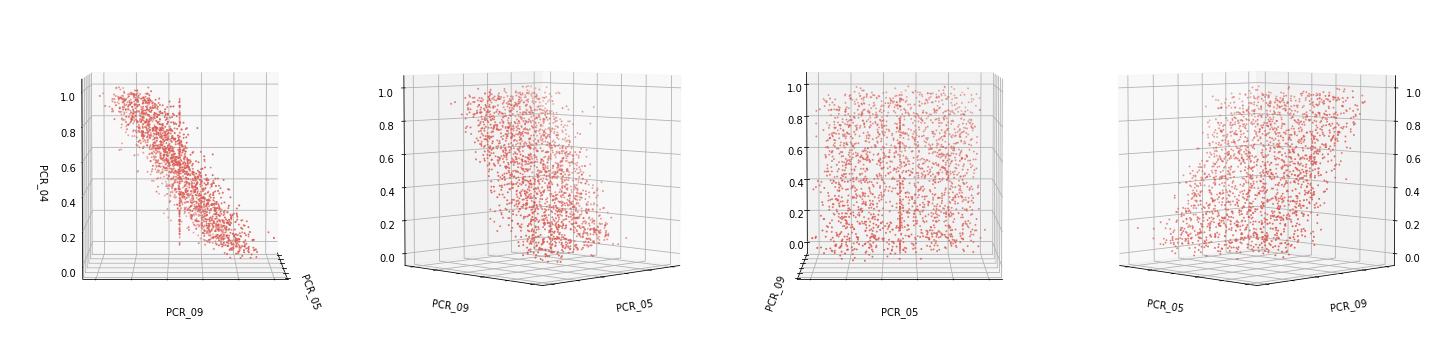

In [ ]:
plot3d(pcr_df, 'PCR_05', 'PCR_09', 'PCR_04')

##**Answer 25**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

y_train_data = pd.DataFrame(train_data, columns = ['risk',	'spread',	'covid'])
X_train_data = train_data.drop(['risk',	'spread',	'covid'], axis = 1)
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=2)
sfs.fit(X_train_data, y_train_data['spread'])
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=5),n_features_to_select=3)
final_2_features = sfs.get_support(indices=False)
for index in range(X_train_data.shape[1]):
  if final_2_features[index] == True:
    print(X_train_data.columns[index])


PCR_05
sugar_levels


In [ ]:
train_data.happiness_score

0       0.875
1       0.750
2       0.625
3       0.875
4       1.000
        ...  
1995    0.625
1996    1.000
1997    0.625
1998    0.625
1999    0.875
Name: happiness_score, Length: 2000, dtype: float64

##**Answer 27 - some of the Analysis**

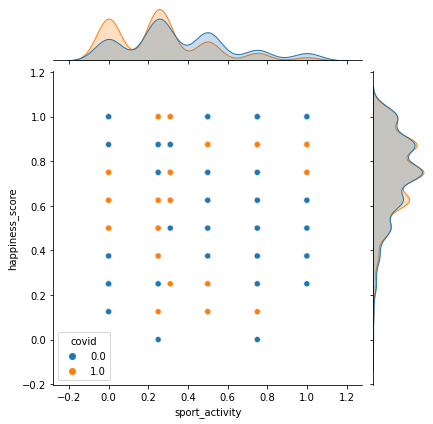

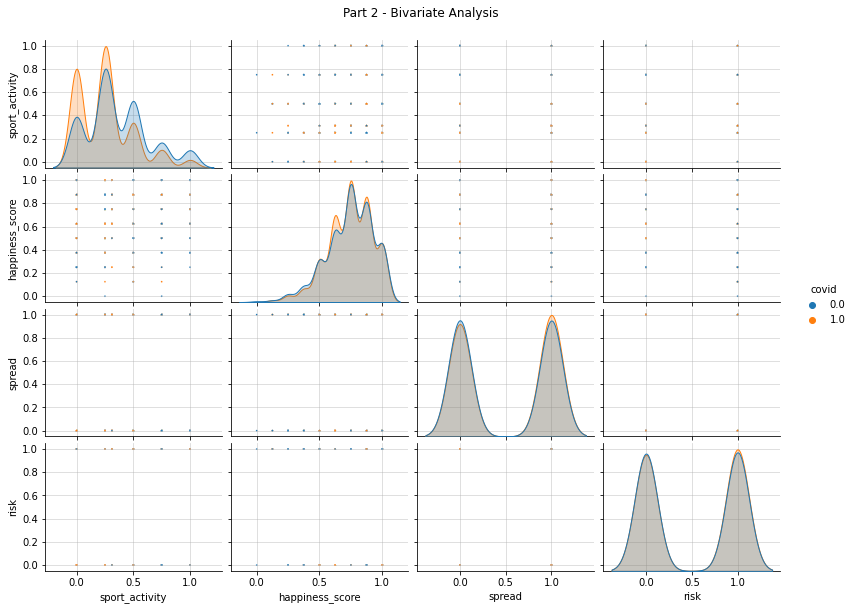

In [ ]:
#question 27
#sns.pairplot(data = prepared_train ,plot_kws={"s": 2} ,vars = "sore_throat, shortness_of_breath ", hue="covid")
#df = prepared_train.copy()
colNames = ['sport_activity','happiness_score', 'covid', 'spread' , 'risk']
#df = prepared_train[colNames]
sns.jointplot(data=train_data, x="sport_activity", y='happiness_score', hue='covid')
g=sns.pairplot(train_data[colNames], hue="covid", plot_kws={"s": 3})
g.fig.suptitle("Part 2 - Bivariate Analysis", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>